Quantidade total de registros: 6901513

Primeiros 10 registros:
   packet                     timestamp           src_ip           dst_ip  \
0       1 2007-01-01 05:00:00.915688038    197.247.88.98  149.173.188.128   
1       2 2007-01-01 05:00:00.915816069    149.53.11.191   59.201.100.146   
2       3 2007-01-01 05:00:00.915937901    197.247.88.98  149.173.188.128   
3       4 2007-01-01 05:00:00.915944099  202.117.132.136    214.2.100.173   
4       5 2007-01-01 05:00:00.916064978       80.58.88.3    164.89.55.232   
5       6 2007-01-01 05:00:00.916312933    197.247.88.98  149.173.188.128   
6       7 2007-01-01 05:00:00.916438103    215.13.122.90  214.130.120.245   
7       8 2007-01-01 05:00:00.916687012    197.247.88.98  149.173.188.128   
8       9 2007-01-01 05:00:00.917062044    197.247.88.98  149.173.188.128   
9      10 2007-01-01 05:00:00.917186022     214.2.97.241     192.168.96.4   

   protocol  size   type  src_port  dst_port  
0         6    54    TCP   25197.0    688

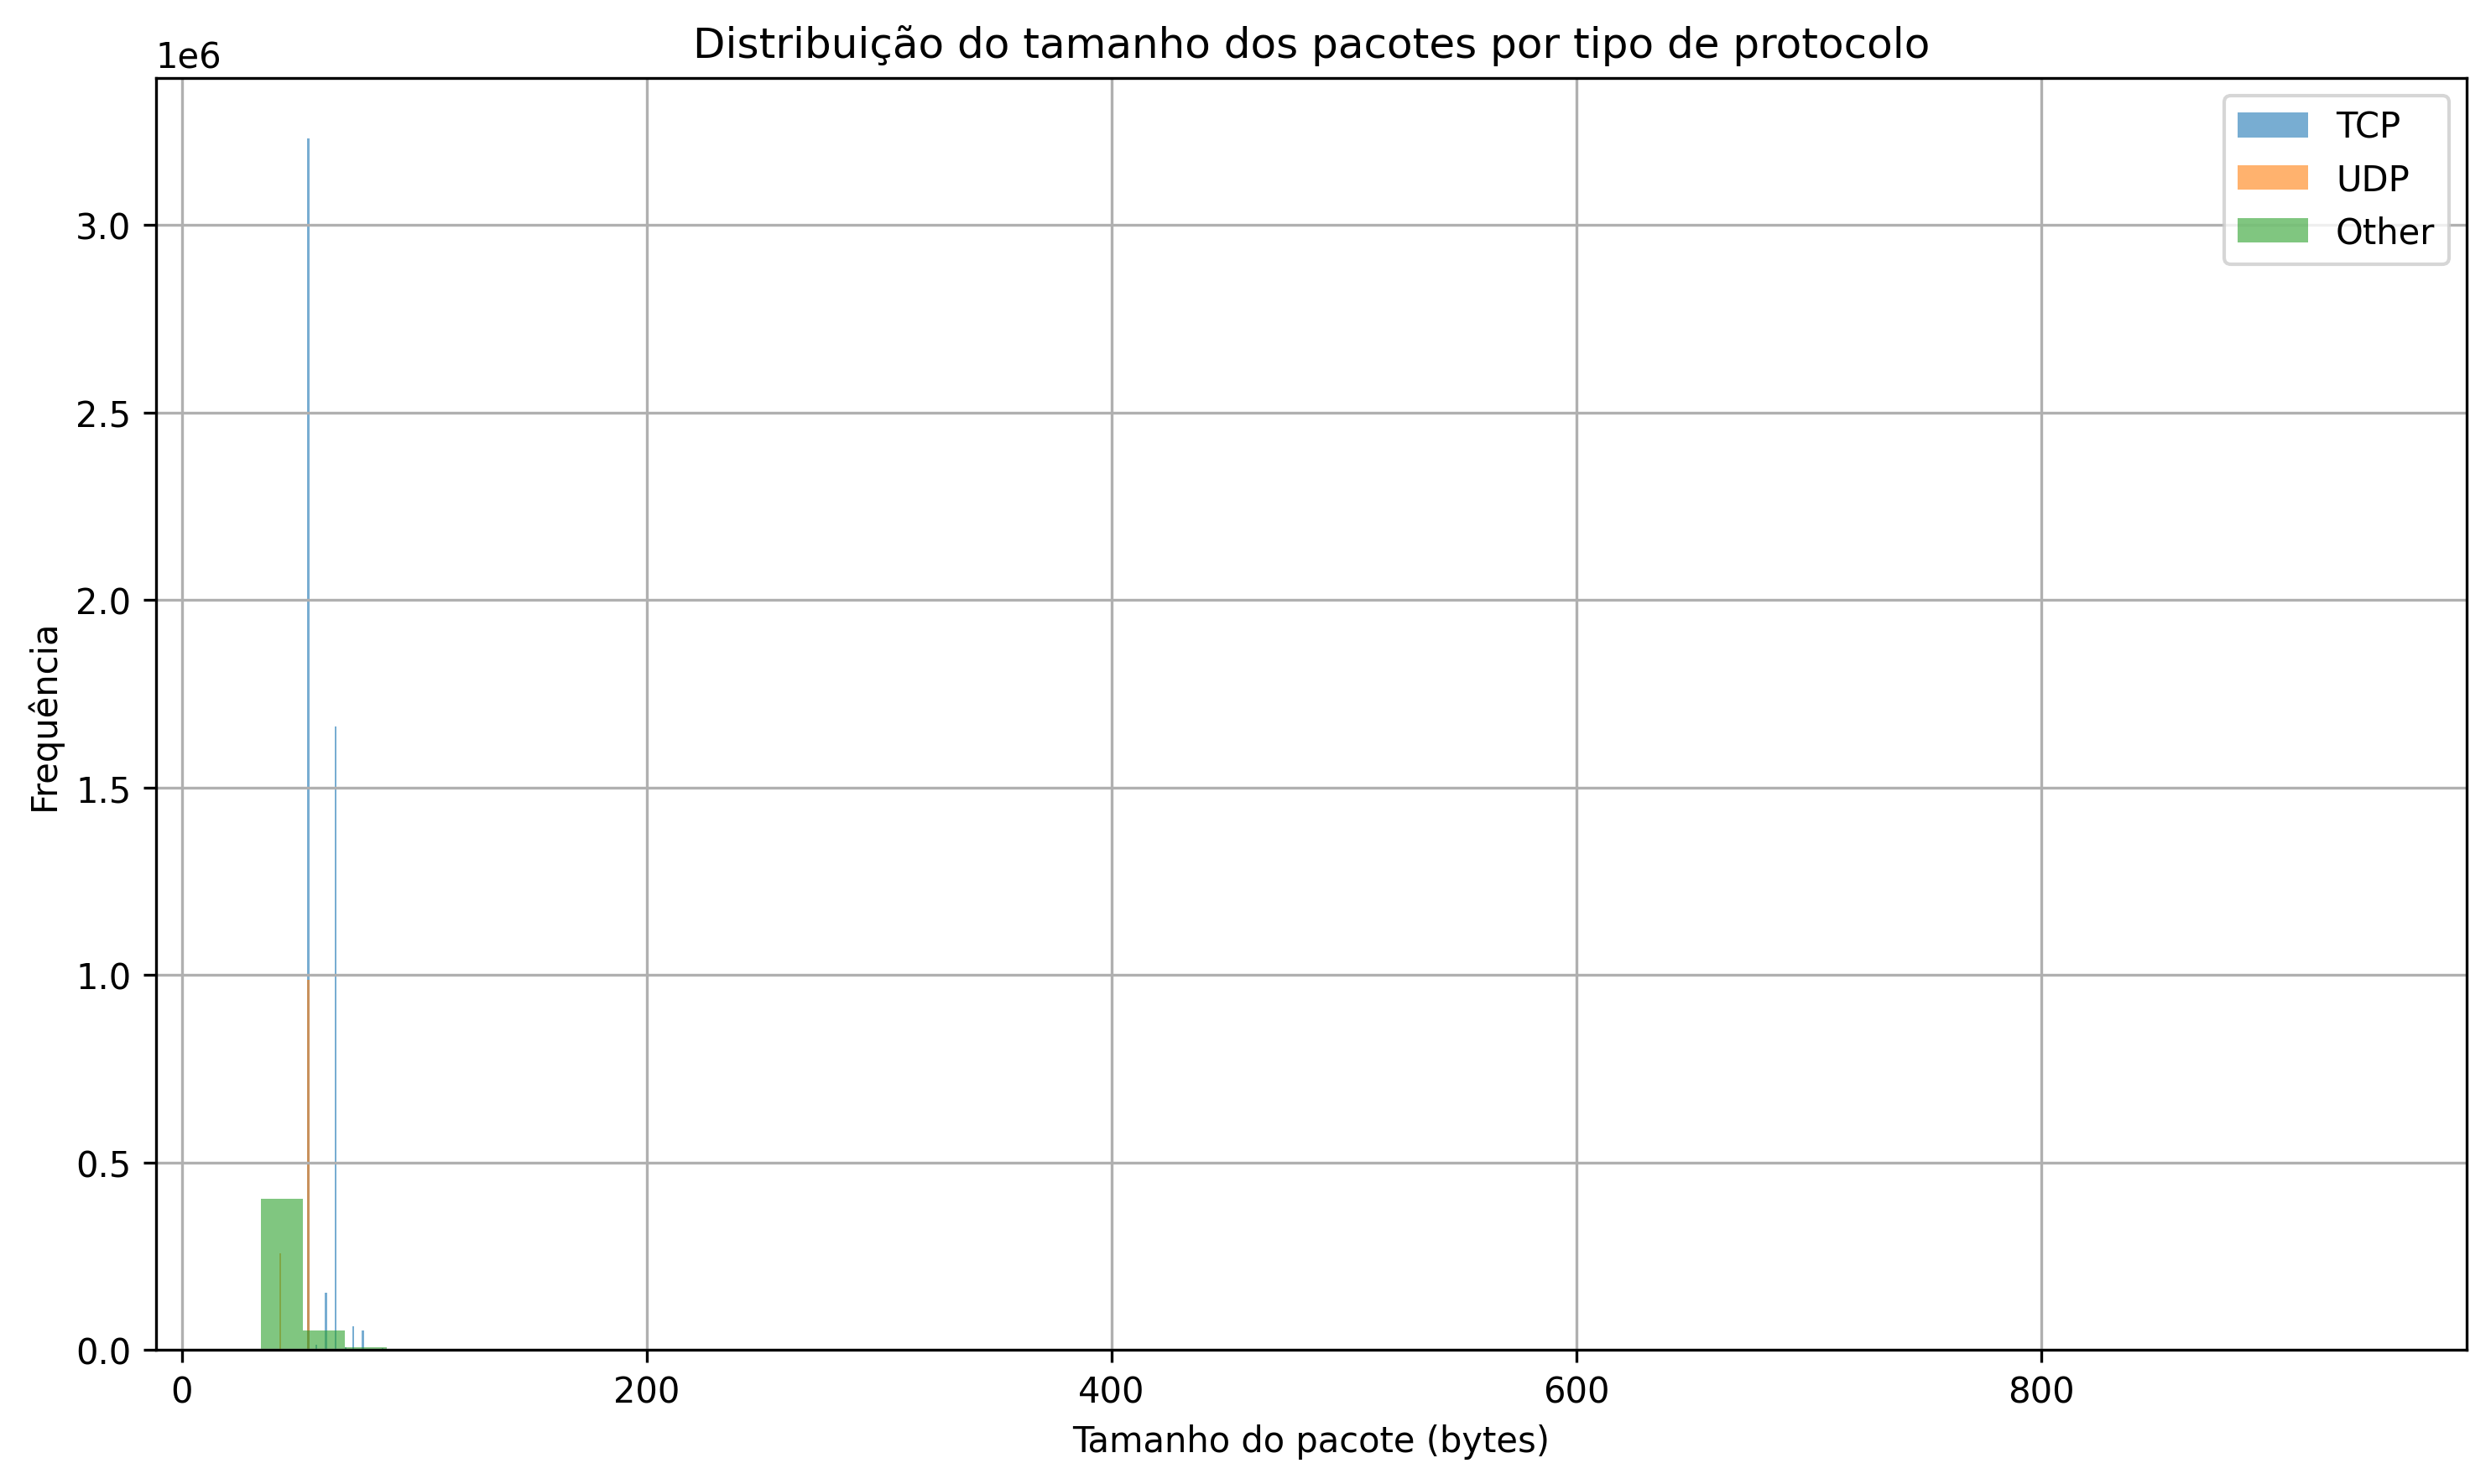

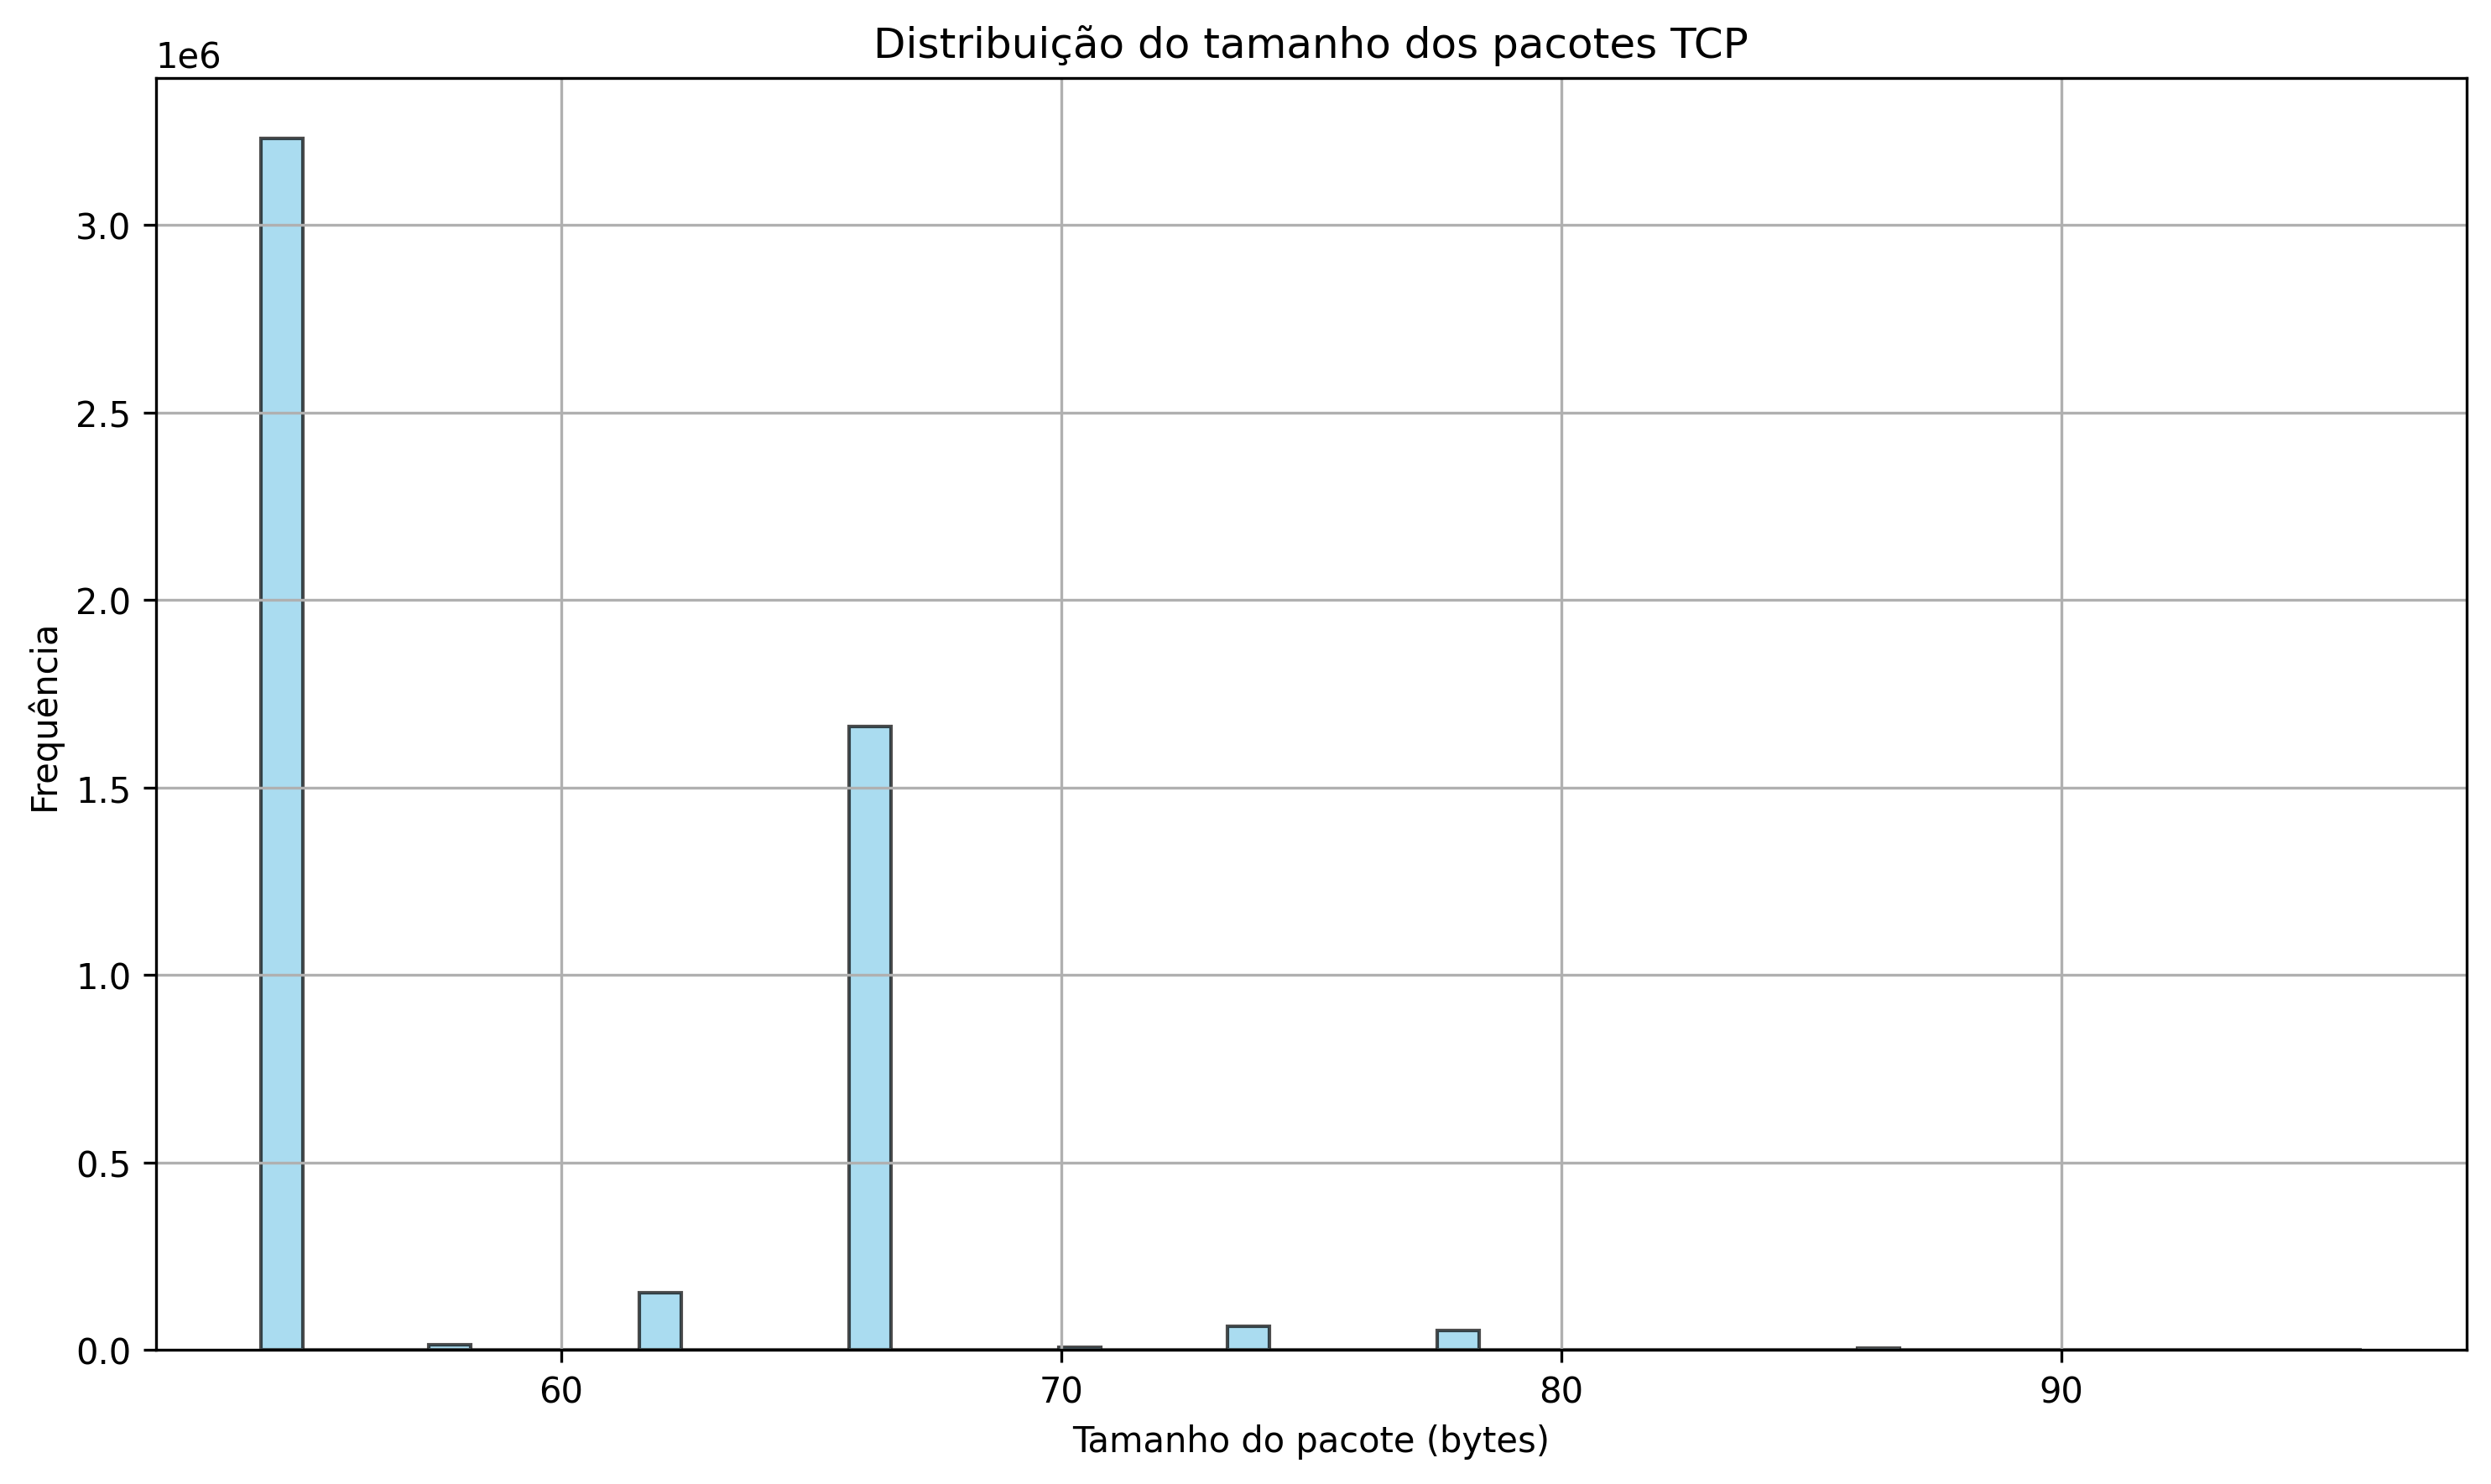

In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt

# Ler o arquivo Parquet
file_name = '/content/drive/MyDrive/PED/TRabalho_3_2025/MAWI/200701011400.parquet'
#file_name = '200701011400.parquet'
df = pd.read_parquet(file_name, engine='pyarrow')

# Mostrar informações básicas
print(f"Quantidade total de registros: {len(df)}")
print("\nPrimeiros 10 registros:")
print(df.head(10))

print("\nTipos de dados por coluna:")
print(df.dtypes)

# Converter para datetime se ainda não estiver
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Criar gráfico de distribuição do tamanho dos pacotes por tipo de protocolo
plt.figure(figsize=(10, 6), dpi=300)

# Verificar se as colunas 'type' e 'size' existem e são válidas
if 'type' in df.columns and 'size' in df.columns:
    for t in df['type'].dropna().unique():
        subset = df[df['type'] == t]
        plt.hist(subset['size'], bins=50, alpha=0.6, label=str(t))

    plt.title("Distribuição do tamanho dos pacotes por tipo de protocolo")
    plt.xlabel("Tamanho do pacote (bytes)")
    plt.ylabel("Frequência")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Salvar o gráfico em alta qualidade
    output_file = "distribuicao_tamanho_pacotes.png"
    plt.savefig(output_file, dpi=300)
    print(f"Gráfico salvo como: {output_file}")
else:
    print("❌ As colunas 'type' ou 'size' não foram encontradas para gerar o gráfico.")


def graficar_tcp(df, output_file='tcp_tamanho_distribuicao.png'):
    """
    Filtra apenas pacotes TCP e gera a distribuição do tamanho.

    Args:
        df (pd.DataFrame): DataFrame contendo as colunas 'type' e 'size'.
        output_file (str): Caminho do arquivo PNG de saída.
    """
    if 'type' not in df.columns or 'size' not in df.columns:
        print("❌ O DataFrame não contém as colunas necessárias.")
        return

    df_tcp = df[df['type'] == 'TCP']

    if df_tcp.empty:
        print("Nenhum pacote TCP encontrado no DataFrame.")
        return

    # Gerar gráfico
    plt.figure(figsize=(10, 6), dpi=300)
    plt.hist(df_tcp['size'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title("Distribuição do tamanho dos pacotes TCP")
    plt.xlabel("Tamanho do pacote (bytes)")
    plt.ylabel("Frequência")
    plt.grid(True)
    plt.tight_layout()

    plt.savefig(output_file, dpi=300)
    print(f"Gráfico TCP salvo como: {output_file}")


# Garantir que a coluna timestamp está no formato datetime, se necessário
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Chamar a função para gerar gráfico apenas para pacotes TCP
graficar_tcp(df)
